In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [3]:
beta <- readRDS("/gpfs/commons/groups/zhu_lab/nattada/data/BetaCellDifferentiationProject/Deep/newpipeline/Seurat/merged_beta.rds")
beta

An object of class Seurat 
50972 features across 333212 samples within 1 assay 
Active assay: RNA (50972 features, 0 variable features)

In [4]:
beta[["percent.mt"]] <- PercentageFeatureSet(beta, pattern = "^MT-")

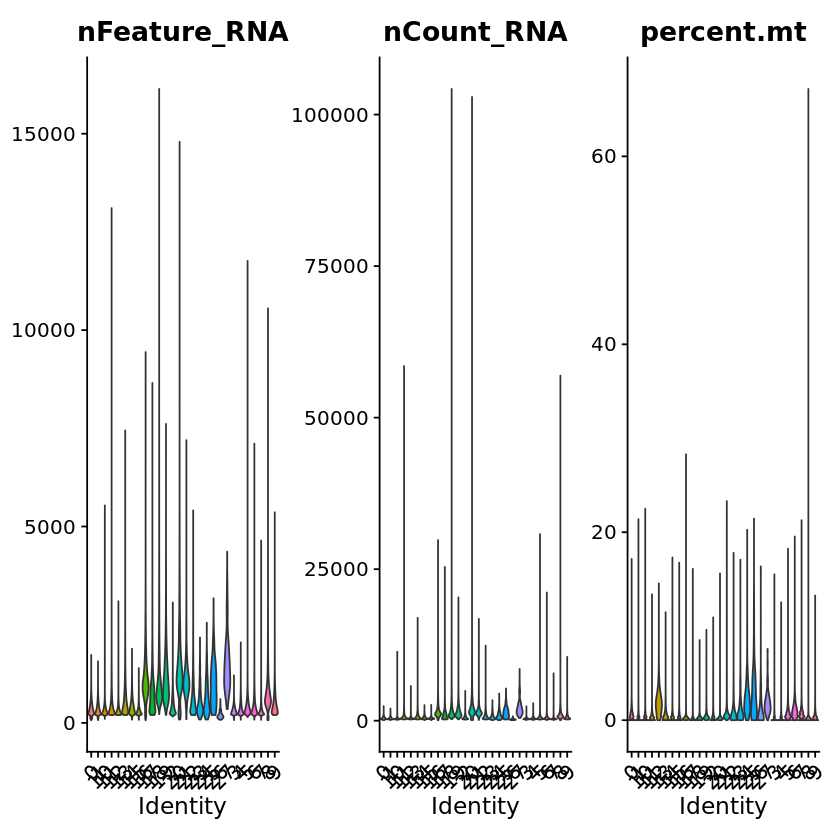

In [5]:
VlnPlot(beta,features = c("nFeature_RNA", "nCount_RNA","percent.mt"),ncol = 3,pt.size=0)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



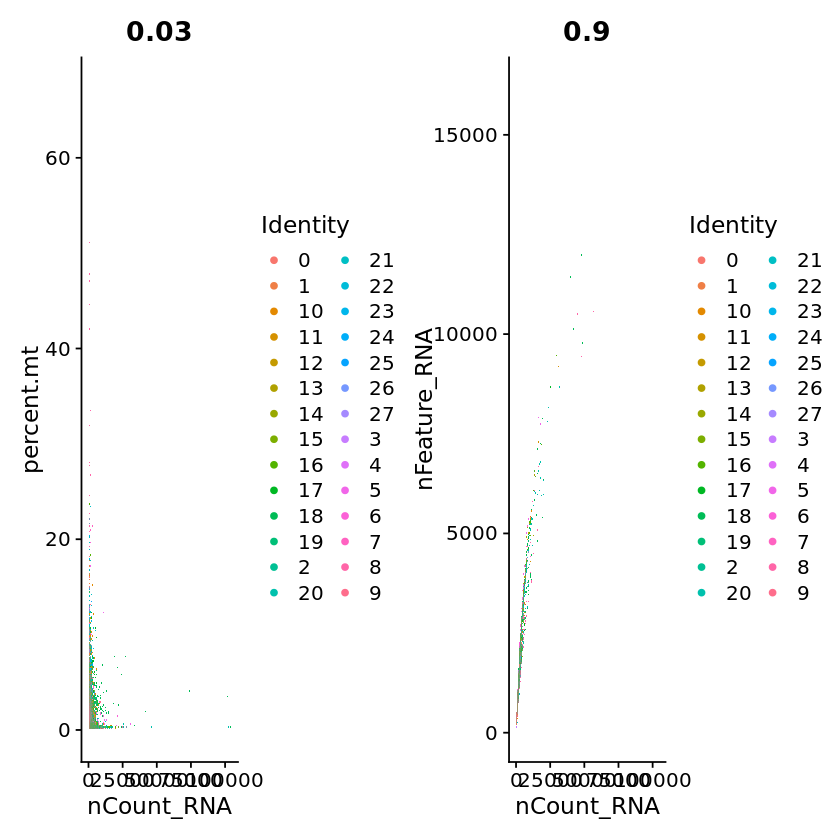

In [6]:
plot1 <- FeatureScatter(beta, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(beta, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

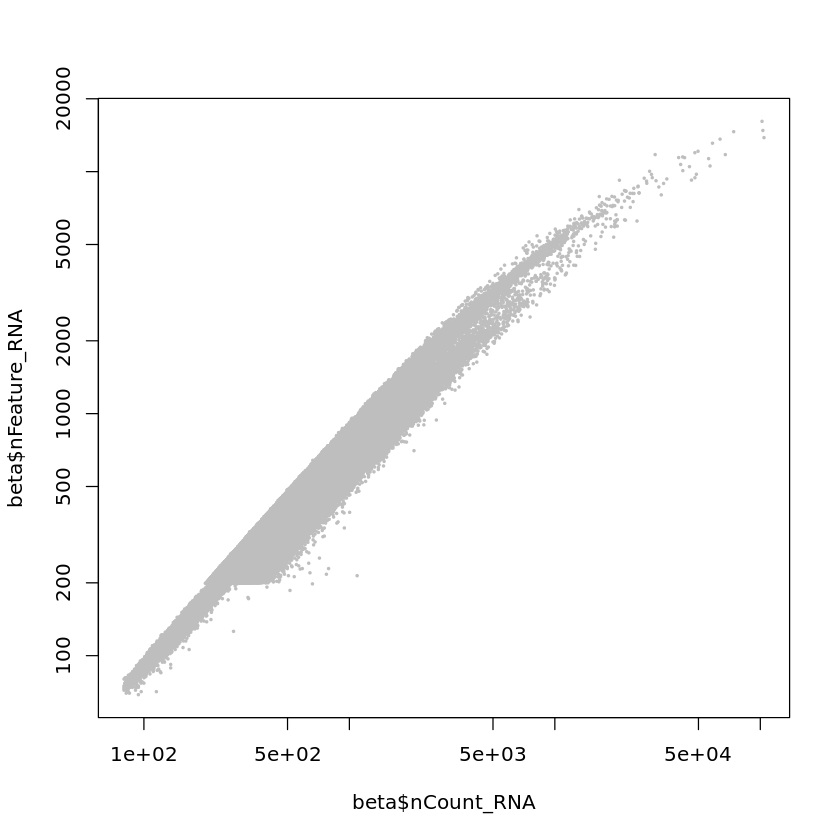

In [7]:
plot(beta$nCount_RNA, beta$nFeature_RNA, log="xy", pch=19, cex=0.25, col="grey")

In [8]:
beta <- NormalizeData(beta, normalization.method = "LogNormalize", scale.factor = 10000)
beta <- NormalizeData(beta)

In [9]:
beta <- FindVariableFeatures(beta, selection.method = "vst", nfeatures = 10000)

In [10]:
top10 <- head(VariableFeatures(beta), 10)

When using repel, set xnudge and ynudge to 0 for optimal results



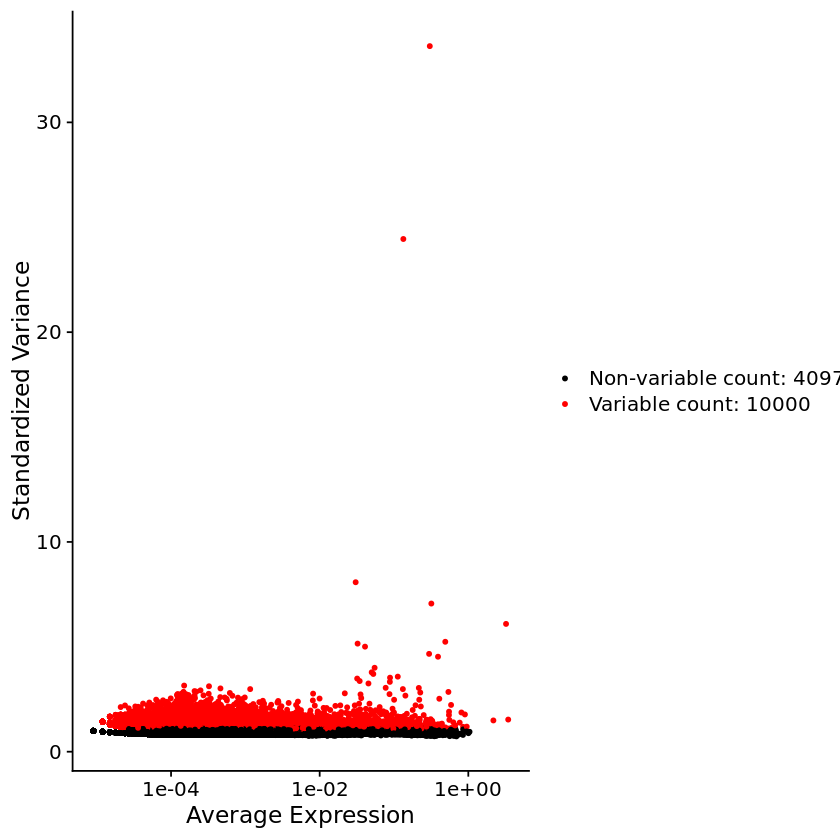

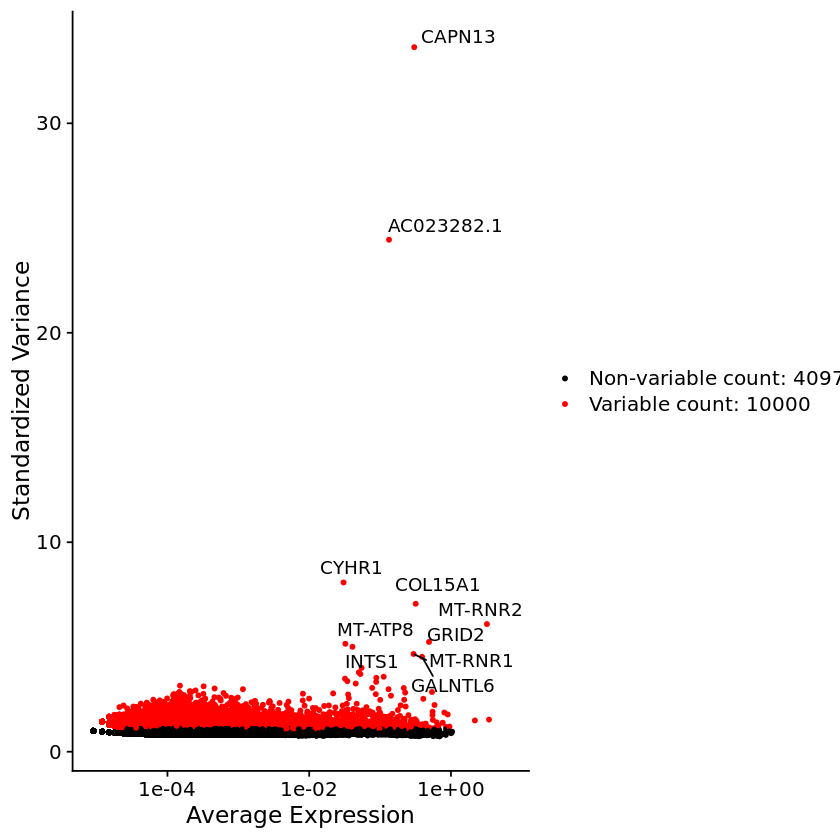

In [11]:
plot1 <- VariableFeaturePlot(beta)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

Regressing out percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  CASC15, PTPRG, FN1, LAMA1, FRAS1, MAGI1, TCF7L2, SEMA3E, TLN2, AC023282.1 
	   GRID2, XACT, CAPN13, ADAMTS12, AC084816.1, ROR2, IMMP2L, FBN2, CDH2, KHDRBS2 
	   WWC2, PTPN13, AC008591.1, ANK3, AC068587.4, EFNA5, SLC2A3, PCDH7, MCC, TCF7L1 
Negative:  ADARB2, ABCC8, TPH1, AC109466.1, CHGA, LMX1A, BRINP3, CCSER1, AC112770.1, PCSK2 
	   GRIA4, LRFN2, AC004147.4, ARPP21, ADARB2-AS1, CDH18, SLC18A1, KCNK17, INS, COL5A2 
	   PLXNA2, CRYBA2, CASR, SLC30A8, SNTG1, AC007614.1, TTC29, NEGR1, LINC01014, VWA5B2 
PC_ 2 
Positive:  GRID2, SEMA3E, AC084816.1, EGFLAM, XACT, FBN2, AC068587.4, P3H2, ADAMTS12, SLC2A3 
	   ROR2, GNGT1, SMAD6, COLEC12, LRRTM4, PTPRG, HAS2, EDA, PTPN13, SGO1-AS1 
	   AL391361.2, EFNA5, COL9A2, COL23A1, BMPER, ANK2, LHFPL2, AC105233.4, AC022140.1, LINC01170 
Negative:  AC023282.1, CAPN13, AP001931.2, PCDHGA2, PCDHGB1, PCDHGB3, PCDHGB2, PCDHGA3, PCDHGA1, PCDHGA7 
	   PCDHGA5, PCDHGA4, PCDHGB4, PCD

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 333212
Number of edges: 7141288

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8971
Number of communities: 60
Elapsed time: 215 seconds


30 singletons identified. 30 final clusters.



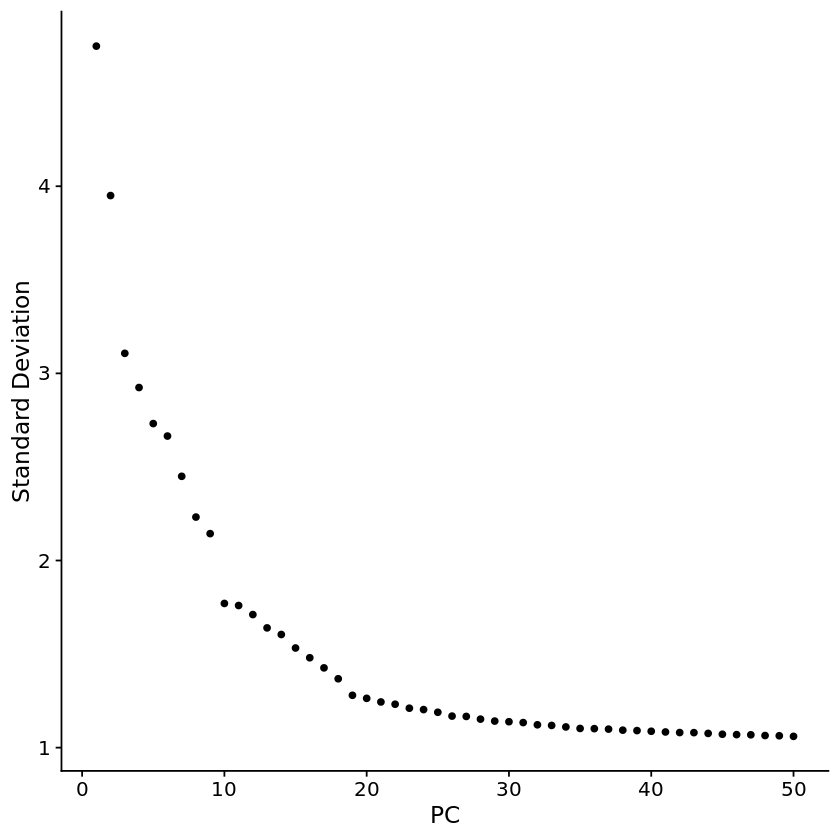

In [12]:
beta <- ScaleData(beta, vars.to.regress = "percent.mt")

beta <- RunPCA(beta, features = VariableFeatures(object = beta))
ElbowPlot(beta, ndims = 50)

k=25
pc.use<-1:20

beta <- FindNeighbors(beta,reduction="pca", dims=pc.use, k.param=k)
beta <- FindClusters(beta, resolution = 1.0, algorithm = 2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 333212
Number of edges: 7141288

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 51
Elapsed time: 227 seconds


30 singletons identified. 21 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:56:15 UMAP embedding parameters a = 1.896 b = 0.8006

20:56:15 Read 333212 rows and found 20 numeric columns

20:56:15 Using Annoy for neighbor search, n_neighbors = 25

20:56:15 Building Annoy index with metric = euclidean, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:56:53 Writing NN index file to temp file /scratch/RtmpgDL4ZP/file21ee3bc4db61

20:56:53 Searching Annoy index using 1 thread, search_k = 2500

21:00:02 Annoy recall = 100%

21:00:03 Commencing smooth kNN distanc

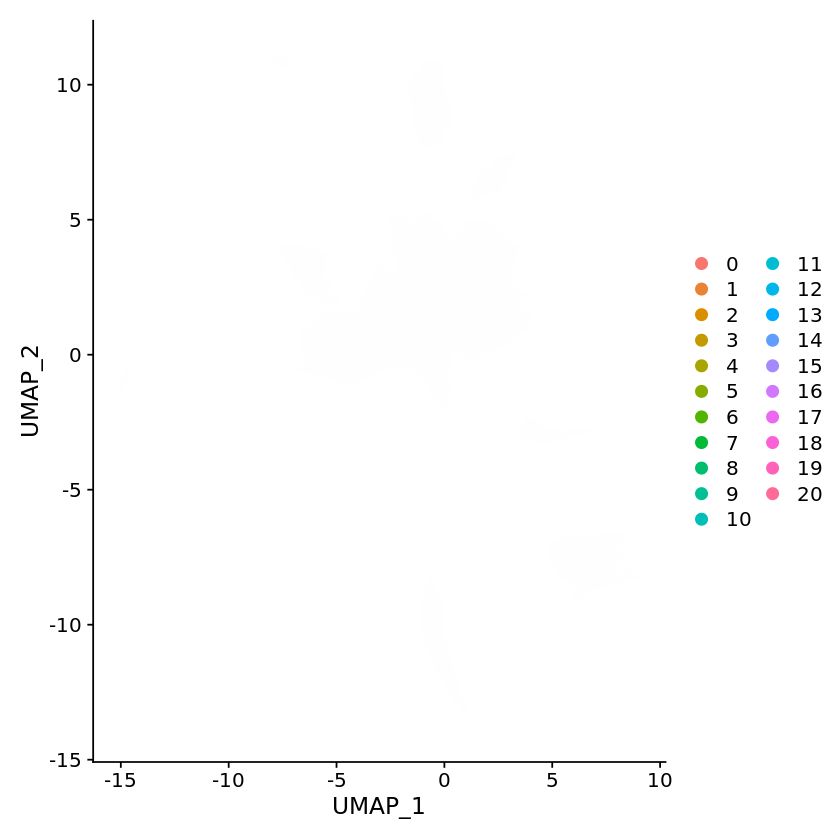

In [13]:
beta <- FindClusters(beta, resolution = 0.5, algorithm = 2)
beta <- RunUMAP(beta, dims = pc.use, metric = "euclidean", min.dist = 0.01,seed.use=131, umap.method = "uwot", n.neighbors = k, uwot.sgd=TRUE, verbose=TRUE)
DimPlot(beta, reduction = "umap")

In [13]:
bc<-matrix(unlist(strsplit(colnames(beta@assays$RNA@counts), split=":")), ncol=4, byrow = T);head(bc)

target<-rep("H3K27ac", dim(bc)[1]);target[bc[,4]>="07"]<-"H3K27me3"

51,A1,B1,05
51,A1,CV,03
51,A1,E1,01
51,A1,FA,11
51,A1,G6,04
51,A1,HQ,05


In [14]:
beta$target<-target

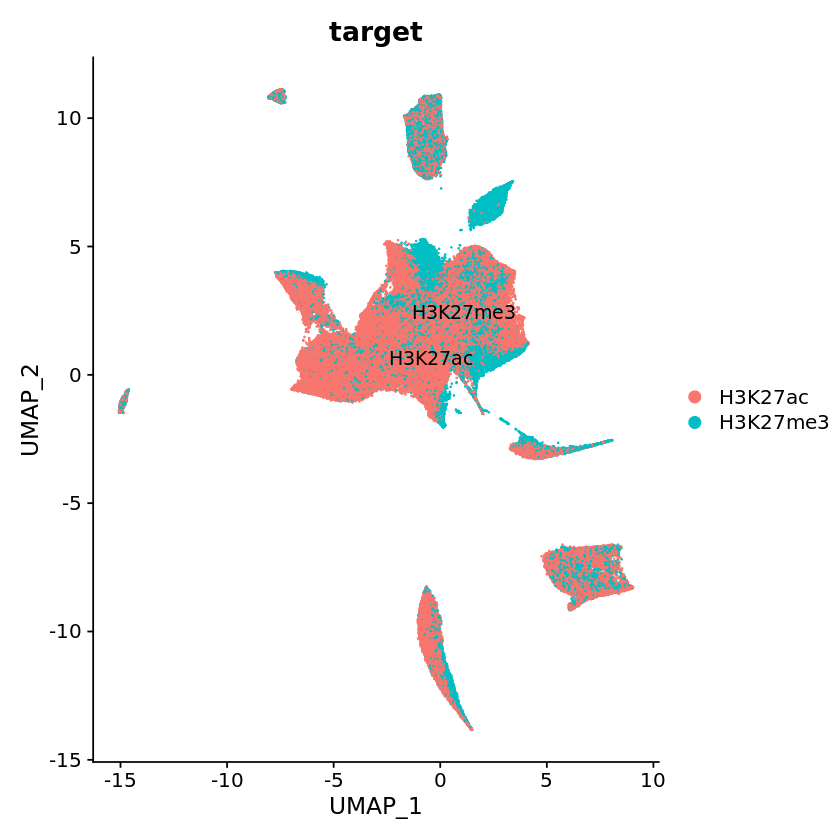

In [14]:
DimPlot(beta, pt.size=0.10, raster=FALSE, label=T, group.by = "target", shuffle = T) 

In [16]:
stage<-rep("D12", dim(bc)[1])
stage[bc[,4]=="03" | bc[,4]=="04" | bc[,4]=="09" | bc[,4]=="10"]<-"D15"
stage[bc[,4]=="05" | bc[,4]=="06" | bc[,4]=="11" | bc[,4]=="12"]<-"D22"

beta$stage<-stage

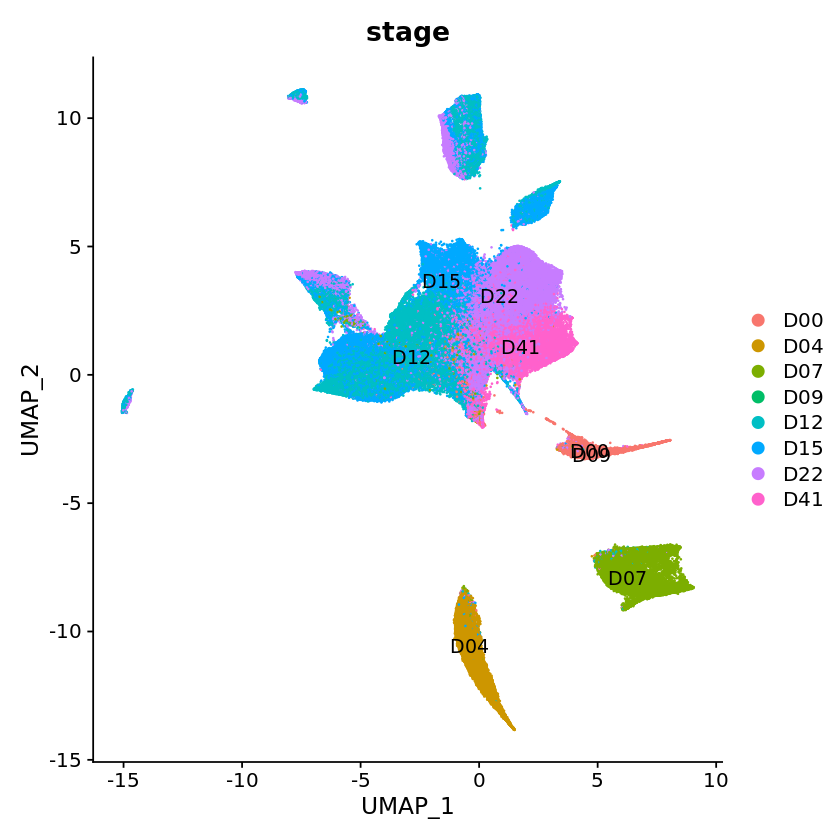

In [15]:
DimPlot(beta, pt.size=0.10, raster=FALSE, label=T, group.by = "stage", shuffle = T) 

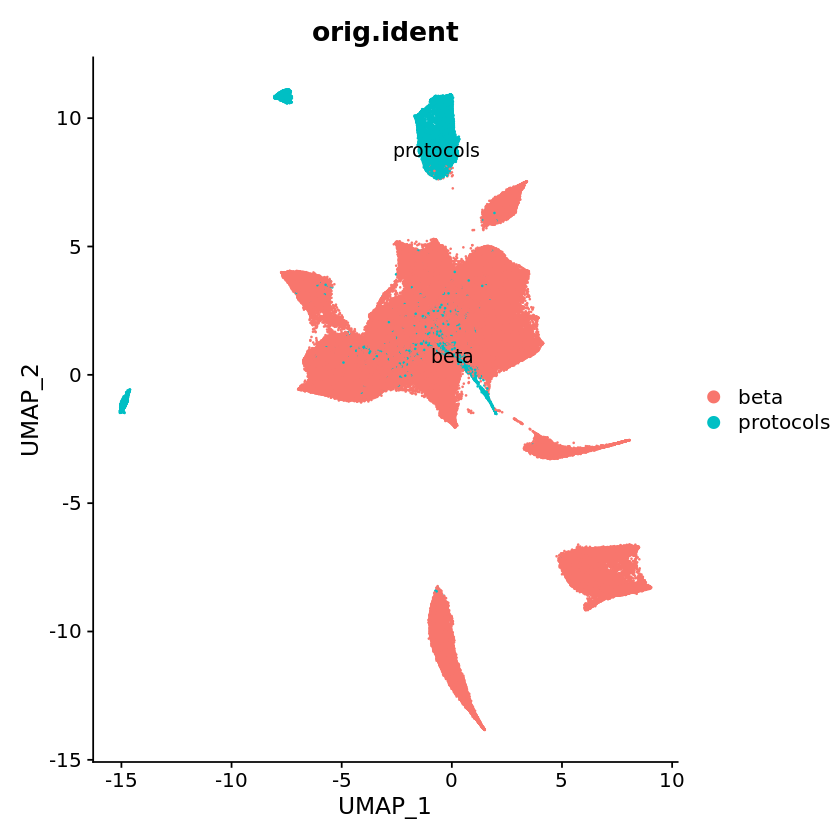

In [16]:
DimPlot(beta, pt.size=0.10, raster=FALSE, label=T, group.by = "orig.ident", shuffle = T) 

In [17]:
table(beta$stage, beta$target)

     
      H3K27ac H3K27me3
  D00   11849     5791
  D04   28140     6285
  D07   22695     9839
  D09       0        4
  D12   55739    13906
  D15   41160    24442
  D22   54076    24413
  D41   21213    13660

In [ ]:
saveRDS(beta, file = "Seurat_merged_beta.rds")